In [1]:
import pandas as pd

data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West', 'North'],
    'Category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A'],
    'Sales': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'Expenses': [30, 45, 50, 60, 75, 85, 90, 100, 110]
}

df = pd.DataFrame(data)
df

,Region,Category,Sales,Expenses
0,North,A,100,30
1,North,B,150,45
2,South,A,200,50
3,South,B,250,60
4,East,A,300,75
5,East,B,350,85
6,West,A,400,90
7,West,B,450,100
8,North,A,500,110


In [5]:
aggregation = df.groupby('Region').agg({
    'Sales': ['sum', 'mean'],
    'Expenses': ['sum', 'max']
})

# Renaming columns to make them more readable
aggregation.columns = ['Sales_Sum', 'Sales_Avg', 'Expenses_Sum', 'Expenses_Max']

# Reorganize the columns to alternate Sales and Expenses
aggregation = aggregation[['Sales_Sum', 'Expenses_Sum', 'Sales_Avg', 'Expenses_Max']]

# Reset the index to make it a regular column
aggregation.reset_index(inplace=True)

aggregation


,Region,Sales_Sum,Expenses_Sum,Sales_Avg,Expenses_Max
0,East,650,160,325.0,85
1,North,750,185,250.0,110
2,South,450,110,225.0,60
3,West,850,190,425.0,100


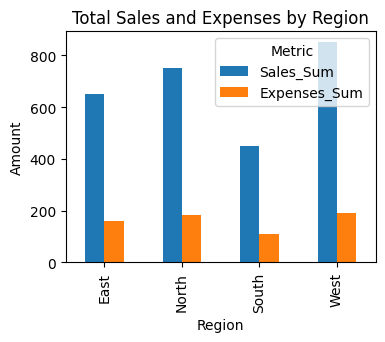

In [7]:
import matplotlib.pyplot as plt

aggregation.plot(
    x='Region',
    y=['Sales_Sum', 'Expenses_Sum'],
    kind='bar',
    figsize=(4, 3)
)

plt.title('Total Sales and Expenses by Region')
plt.ylabel('Amount')
plt.xlabel('Region')
plt.legend(title='Metric')
plt.show()


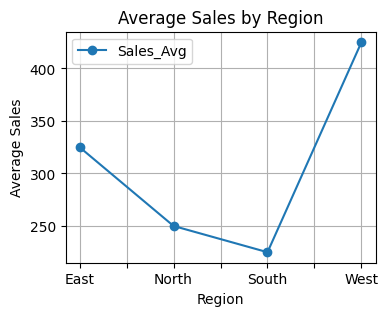

In [10]:
aggregation.plot(
    x='Region',
    y='Sales_Avg',
    kind='line',
    marker='o',
    figsize=(4, 3)
)

plt.title('Average Sales by Region')
plt.ylabel('Average Sales')
plt.xlabel('Region')
plt.grid(True)
plt.show()


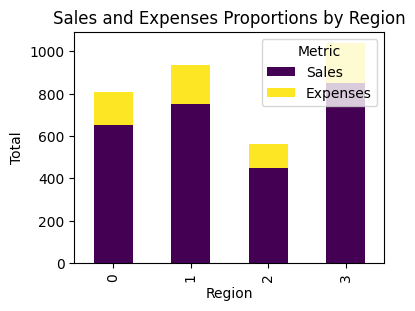

In [12]:
aggregation[['Sales_Sum', 'Expenses_Sum']].plot(
    kind='bar',
    stacked=True,
    figsize=(4, 3),
    colormap='viridis'
)

plt.title('Sales and Expenses Proportions by Region')
plt.ylabel('Total')
plt.xlabel('Region')
plt.legend(title='Metric', labels=['Sales', 'Expenses'])
plt.show()


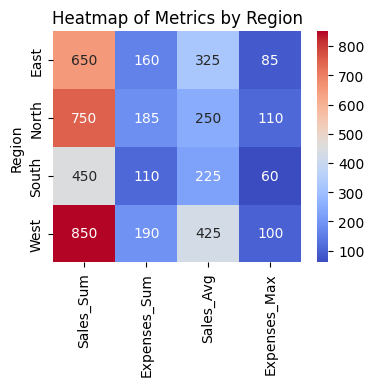

In [13]:
import seaborn as sns
plt.figure(figsize=(4, 3))

sns.heatmap(
    aggregation.set_index('Region'),
    annot=True,
    fmt='.0f',
    cmap='coolwarm',
    cbar=True
)

plt.title('Heatmap of Metrics by Region')
plt.show()


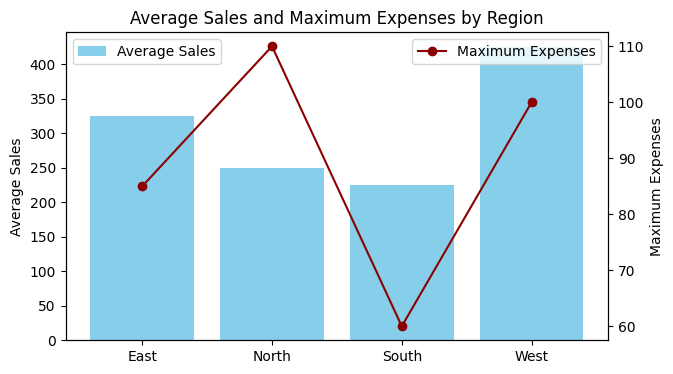

In [15]:
fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.bar(aggregation['Region'], aggregation['Sales_Avg'], color='skyblue', label='Average Sales')
ax1.set_ylabel('Average Sales')
ax1.set_title('Average Sales and Maximum Expenses by Region')

ax2 = ax1.twinx()
ax2.plot(aggregation['Region'], aggregation['Expenses_Max'], color='darkred', marker='o', label='Maximum Expenses')
ax2.set_ylabel('Maximum Expenses')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
